In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from IPython.display import Image, display
from matplotlib.colors import ListedColormap
import os
import struct

## Implementation of a Vanilla SVM for 2 class problem

In [220]:
class SVM(object):
    def __init__(self,lr=0.01,max_iter=100,reg = 0.01,tol = 10e-2):
        self.lr = lr
        self.max_iter = max_iter
        self.reg = reg
        self.tol = tol
    def affine(self,X):
        return np.dot(X,self.w[1:])+self.w[0]
    def fit(self,X,y):
        self.w = np.zeros(1+X.shape[1])
        v = np.copy(self.w)
        self.labels = np.unique(y)
        y[np.where(y==0)] = -1
        for _ in np.arange(self.max_iter): 
            f = self.affine(X)
            for i in np.arange(y.shape[0]):
                if(f[i]*y[i]<1):
                    v[1:] += self.reg*self.w[1:]-y[i]*X[i,:]
                    v[0] += self.w[0]-y[i]
            self.w[1:] = self.w[1:]-self.lr*v[1:]/y.shape[0]
            self.w[0] = self.lr*v[0]/y.shape[0]
        return self
    def predict(self,X):
        pred = X.shape[0]
        f = self.affine(X)
        pred = np.where(f<1,self.labels[0],self.labels[1])
        return pred

In [214]:
bankNotes_dir = "./../Data/data_banknote_authentication.txt"

In [215]:
nm = ['Variance of Wavelet','Skewness of Wavelet','Curtosis of Wavelet','Entropy','Class']
data = pd.read_csv(bankNotes_dir,sep = ",",names=nm)

In [252]:
X = data[['Variance of Wavelet','Skewness of Wavelet','Curtosis of Wavelet','Entropy']].as_matrix()
Y = data[['Class']].as_matrix()
Y[Y==0] = -1

In [253]:
#Randomly split training and test set
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 123)

In [277]:
support = SVM(lr=0.01,max_iter=850,reg = 0.0001,tol=1e-3)
support.fit(X_train ,Y_train)
pred = support.predict(X_test)

In [278]:
print('Accuracy in Identifying Correct Bill Class {:0.2f}%'.format(100*np.sum(pred == Y_test.flatten())/Y_test.shape[0]))

Accuracy in Identifying Correct Bill Class 96.73%


In [262]:
SV = SVC(random_state = 123,kernel = 'linear')
SV.fit(X_train, Y_train.flatten())
preds = SV.predict(X_test)

In [263]:
print('Accuracy in Identifying Correct Bill Class {:0.2f}%'.format(100*np.sum(preds == Y_test.flatten())/Y_test.shape[0]))

Accuracy in Identifying Correct Bill Class 98.91%


In [279]:
from sklearn.linear_model import SGDClassifier
SVM_SGD= SGDClassifier(loss="hinge", penalty="l2",tol = 1e-3)
SVM_SGD.fit(X_train, Y_train.flatten())
preds = SV.predict(X_test)

In [280]:
print('Accuracy in Identifying Correct Bill Class {:0.2f}%'.format(100*np.sum(preds == Y_test.flatten())/Y_test.shape[0]))

Accuracy in Identifying Correct Bill Class 98.91%


## Support Vector Machine on the MNIST digits

In [2]:
def load_mnist(path, kind = 'train'):
    #Load MNIST data from 'path'
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    
    #The with statement gurantees that the file will be closed no matter how the nested block exits
    #Open arguments: 'rb' -> r=reading b=binary file mode
    #Refer to the opened file as libpath
    with open(labels_path, 'rb') as libpath:
        #(>) big-endian and II refers to 2 usigned integers of 4 bytes each
        #we read in 8 bytes and stores them as the magic number and the number of items
        #See the MNIST website for the data description
        magic, n = struct.unpack('>II',libpath.read(8))
        #fromfile is a function in the numpy package
        #A highly efficient way of reading binary data with a known data-type, 
        #as well as parsing simply formatted text files. 
        #Since count was not supplied it will read in all values
        labels = np.fromfile(libpath, dtype = np.uint8)
        #similar but reading in 4 unsigned integers to start
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
        #the reshape option transforms the array into the correct type of matrix
        #nx784-- note the tru data is a 28x28 image
        images = np.fromfile(imgpath, dtype = np.uint8).reshape(num,rows*cols)
    print('Observations labels: %d, Observations Images: %d' % (n,num))
    return images, labels

## Print methods for the MNIST dataset

In [3]:
def print_mnist(images,labels,seed = 123):
    obs= np.arange(10)
    fig,ax = plt.subplots(nrows = 2, ncols = 5,sharex = True, sharey = True)
    ax = ax.flatten()
    for i in obs:
        imgs = images[labels == i,:]
        n = imgs.shape[0]
        index = np.random.choice(np.arange(n),size=1,replace = False)
        img = imgs[index,:].reshape(28,28)
        xlabel = "{}".format(labels_dict[i])
        ax[i].imshow(img, cmap = 'Greys')   
        ax[i].set_xlabel(xlabel)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()
    plt.close()
    return

def plot_error(images, labels_true, labels_pred):
    fig, axes = plt.subplots(3, 2)
    p = np.not_equal(labels_true,labels_pred)
    err = p[p==True].shape[0]/p.shape[0]
    acc = 1 - err
    print("Total miss-classified: {} out of: {}\nMiss-classification error: {:0.2f}%\nAccuracy :{:0.2f}%".format(p[p==True].shape[0],p.shape[0],100*err,100*acc))
    images = images[p,:]
    labels_true = labels_true[p]
    labels_pred = labels_pred[p]
    for i, ax in enumerate(axes.flat):
        if i< p[p==True].shape[0]:
            ax.imshow(images[i].reshape((28,28)), cmap='gray')
            xlabel = "(True: {0}, Predicted: {1})".format(labels_dict[labels_true[i]], labels_dict[labels_pred[i]])

            ax.set_xlabel(xlabel)
            ax.set_xticks([])
            ax.set_yticks([])
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

##  Many choies for measuring the predictive classification task exist

### Below we use Precision, Recall, and the F1 score

Accuracy is the proportion of values correctly predicted.

Precision is the positive predictive value which measures the proportion of true positives to actual positives.

Recall/Sensitivity measures the proportion of true positives to the total predictive positives.

Tthe harmonic mean of precision and recall is also a common measure used to measure the performance of a classifier. ($F_1$-Score)

${\displaystyle F=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}}$

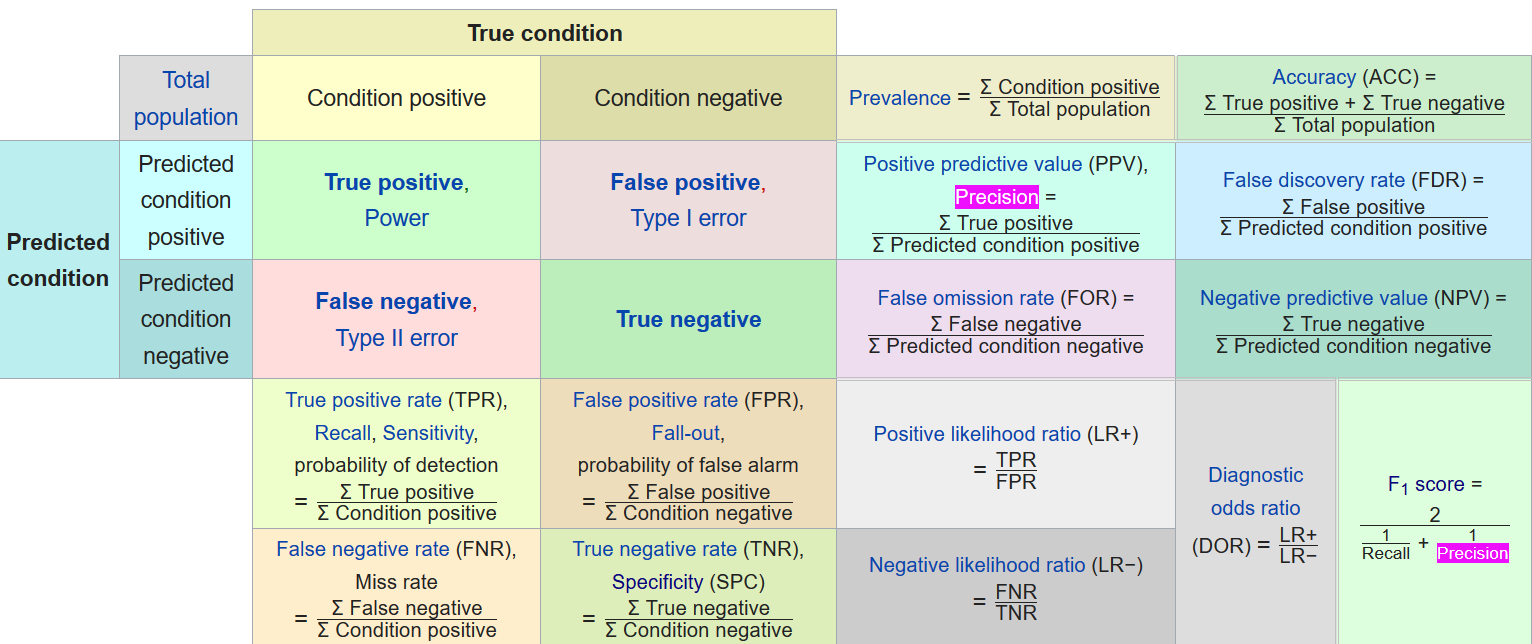

In [4]:
Image('Notebook_Images/ClassificationChart.png')

In [5]:
def accuracy(ConfusionMatrix):
    CF = np.copy(ConfusionMatrix.as_matrix())
    TP = np.sum(np.diagonal(CF))
    np.fill_diagonal(CF,0)
    FP =np.sum(CF)
    return TP/(TP+FP)   

#Precision measures the accuracy of the positive predictions
def Precision(ConfusionMatrix):
    CF = np.copy(ConfusionMatrix.as_matrix())
    TP = np.diagonal(ConfusionMatrix)
    np.fill_diagonal(CF,0)
    FP =np.sum(CF,axis=0)
    return TP/(TP+FP)

#Recall(sensitivity, True Positive Rate)
def Recall(ConfusionMatrix):
    CF = np.copy(ConfusionMatrix.as_matrix())
    TP = np.diagonal(ConfusionMatrix)
    np.fill_diagonal(CF,0)
    FN =np.sum(CF,axis=1)
    return TP/(TP+FN)

def F1_Score(ConfusionMatrix):
    precision = Precision(ConfusionMatrix)
    recall = Recall(ConfusionMatrix)
    F1 = 2*(precision*recall)/(precision+recall)
    return F1

def confusionMatrix(pred_labels,actual_labels,label_dict):
    labels = [labels_dict[i] for i in label_dict.keys()]
    M = actual_labels.shape[0]
    tmp = np.array([np.arange(M,dtype =np.int32)+1,pred_labels,actual_labels]).T
    result = pd.DataFrame(data = tmp, columns=['ImageId', 'Predicted_Label','Actual_Label'])
    n = 10
    conf = np.zeros([n,n],dtype = np.int32)
    for i in range(n):
        for j in range(n):
            conf[i,j] = np.sum(result[result["Actual_Label"] == i]["Predicted_Label"] == j)
    confusion = pd.DataFrame(conf,index=labels,columns=labels)
    pd.Series.__unicode__ = pd.Series.to_string
    err = np.sum(confusion.T)-np.diag(confusion)
    precision = pd.DataFrame(Precision(confusion), columns=['Precision'],index=labels)
    recall = pd.DataFrame(Recall(confusion), columns=['Recall'],index=labels)
    F1 = pd.DataFrame(F1_Score(confusion), columns=['F1'],index=labels)
    confusion = pd.concat([confusion,precision,recall,F1],axis=1)
    return confusion

In [8]:
mnist_loc = "../Data"

In [9]:
X_train, y_train = load_mnist(mnist_loc,kind = "train")
shuffle_ind = np.random.permutation(X_train.shape[0])
X_train, y_train = X_train[shuffle_ind,:], y_train[shuffle_ind] 
rescale = MinMaxScaler(feature_range=(-1, 1))
X_train = rescale.fit_transform(X_train)

Observations labels: 60000, Observations Images: 60000


C:\Users\Timot\Anaconda3\envs\ML-GPU\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
X_test, y_test = load_mnist(mnist_loc,kind = "t10k")
rescale2 = MinMaxScaler(feature_range=(-1, 1))
X_test = rescale2.fit_transform(X_test)

Observations labels: 10000, Observations Images: 10000


C:\Users\Timot\Anaconda3\envs\ML-GPU\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
labels_dict = {0:'Zero'
,1:'One'
,2:'Two'
,3:'Three'
,4:'Four'
,5:'Five'
,6:'Six'
,7:'Seven'
,8:'Eight'
,9:'Nine'}

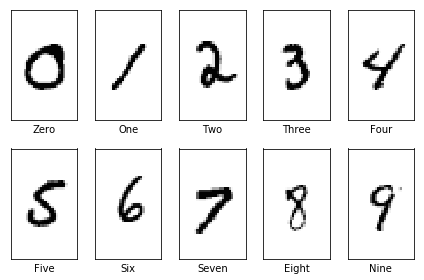

In [12]:
print_mnist(X_train, y_train)

---
# The following is an implementation of SVM from the SKLEARN library

SVM has the optimization objective of maximizing the margin
I.e., the distance between the seperating hyperplane(decision boundary) 
and the training samples that are closest to this plane(support vectors)

The center of the margin:
$$w_0 + w^TX = 0$$
The lower and upper margins are:
\begin{array}{c c}
w_0+w^TX_{+}=1\,, & w_0+w^TX_{-} = -1
\end{array}
respectively.

Thus, the magin is $$2= w^T(X_{+}-X_{-})$$ .


\begin{array}{c c}
w_0+w^Tx^{(i)}\geq 1 & \text{if } y^{(i)} =1\\
w_0+w^Tx^{(i)}< -1 & \text{if } y^{(i)} = -1\\
\end{array}

The more compact form is:
$$y^{(i)}(w_0 + w^T x^{(i)})\geq 1 \forall i$$

Leading to the quadratic programing problem:
\begin{array}{c c}
\min_{w,w_0} \frac{1}{2}\|w\|_2^2 \text{ subject to } y^{(i)}(w_0 + w^T x^{(i)})\geq 1 \forall i
\end{array}

Large decision boundaries help reduce the generalization error.
While Small margins overfit the data.

We can add a slack variable $\xi$ to relax the linear constraints to allow for nonlinear seperability.

\begin{array}{c c}
w_0+w^Tx^{(i)}\geq 1-\xi^{(i)} & \text{if } y^{(i)} =1\\
w_0+w^Tx^{(i)}< -1+\xi^{(i)} & \text{if } y^{(i)} = -1\\
\end{array}

The new problem becomes:
\begin{array}{c c}
\min_{w,w_0} \frac{1}{2}\|w\|_2^2 +C\left(\sum_i \xi^{(i)}\right)\text{ subject to } y^{(i)}(w_0 + w^T x^{(i)})\geq 1-\xi^{(i)} \forall i
\end{array}

C-is used to control the width of the margin. Large values of C correspond to large error penalities and small values correspond to less strict penalities for missclassification.


In [13]:
from sklearn.svm import SVC
SVM = SVC(random_state = 123,kernel = 'linear')
SVM.fit(X_train, y_train)
preds = SVM.predict(X_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
preds = SVM.predict(X_test)

Total miss-classified: 644 out of: 10000
Miss-classification error: 6.44%
Accuracy :93.56%


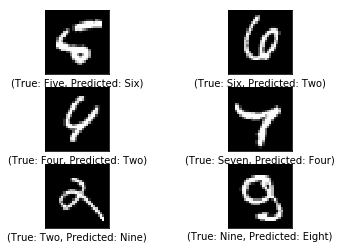

In [15]:
plot_error(images = X_test, labels_true = y_test, labels_pred = preds)

In [16]:
cm = confusionMatrix(pred_labels = preds,actual_labels = y_test,label_dict = labels_dict)
cm

,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Precision,Recall,F1
Zero,955,0,5,1,1,8,7,1,0,2,0.952144,0.974490,0.963187
One,0,1118,5,3,0,1,1,1,6,0,0.967965,0.985022,0.976419
Two,7,9,962,8,3,6,9,8,17,3,0.918816,0.932171,0.925445
Three,4,1,14,954,1,14,2,5,13,2,0.894934,0.944554,0.919075
Four,1,1,8,0,941,2,7,1,2,19,0.936318,0.958248,0.947157
Five,12,5,4,42,5,784,14,2,20,4,0.908459,0.878924,0.893447
Six,8,2,11,1,6,18,909,0,3,0,0.949843,0.948852,0.949347
Seven,3,8,23,13,9,1,0,950,3,18,0.956697,0.924125,0.940129
Eight,7,4,10,31,8,25,7,5,870,7,0.922587,0.893224,0.907668
Nine,6,7,5,13,31,4,1,20,9,913,0.943182,0.904856,0.923622


# SVM with a Gaussian Kernel

In [17]:
SVM = SVC(random_state = 123,kernel='rbf')
SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
preds = SVM.predict(X_test)

Total miss-classified: 321 out of: 10000
Miss-classification error: 3.21%
Accuracy :96.79%


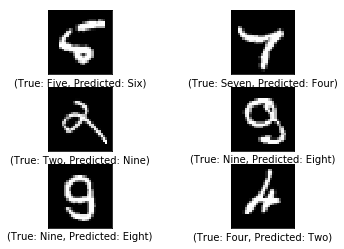

In [19]:
plot_error(images = X_test, labels_true = y_test, labels_pred = preds)

In [20]:
cm = confusionMatrix(pred_labels = preds,actual_labels = y_test,label_dict = labels_dict)
cm

,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Precision,Recall,F1
Zero,970,0,2,0,0,3,2,1,2,0,0.971944,0.989796,0.980789
One,0,1124,3,1,0,1,3,1,2,0,0.982517,0.990308,0.986398
Two,5,1,994,4,4,0,2,10,11,1,0.958534,0.963178,0.960851
Three,0,0,6,979,0,7,0,8,7,3,0.961690,0.969307,0.965483
Four,1,0,6,0,954,0,2,2,2,15,0.964611,0.971487,0.968037
Five,5,2,1,14,2,853,5,1,7,2,0.970421,0.956278,0.963298
Six,9,2,2,0,2,4,936,0,3,0,0.981132,0.977035,0.979079
Seven,1,9,18,3,3,0,0,979,2,13,0.964532,0.952335,0.958395
Eight,3,0,3,8,6,9,3,5,935,2,0.958974,0.959959,0.959466
Nine,4,6,2,9,18,2,1,8,4,955,0.963673,0.946482,0.955000


### We implement SVM using TensorFlow

In [21]:
import tensorflow as tf

Gaussian Kernel

$$\phi(x)=\exp(-\epsilon\|x\|^2)$$

In [59]:
def RBF(x):
    # Gaussian (RBF) kernel
    epsilon = tf.constant(4.0)
    sq_dist = tf.multiply(2., tf.matmul(x, tf.transpose(x)))
    inner = tf.multiply(-1.0*epsilon, sq_dists)
    my_kernel = tf.exp(inner)
    return my_kernel

In [35]:
classes = 10

In [36]:
#Reset default graph prior to interactive session(good habit prevents duplicate graphs)
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [39]:
#Define placeholders for X and Y
xdim = X_train.shape[1]
x  = tf.placeholder(tf.float32, shape=[None,xdim])
y = tf.placeholder(shape=[None],dtype = tf.int32)
y_onehot = tf.one_hot(y,classes)

In [40]:
W = tf.Variable(tf.truncated_normal([xdim,1], stddev=0.02),name ="Weights")
b = tf.Variable(tf.truncated_normal([1],stddev=0.02),name ="Bias")

In [41]:
linear_part = tf.matmul(x,W)+b

In [42]:
loss =  hinge_loss(linear_part, y_onehot)
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

In [43]:
init_op = tf.global_variables_initializer()  
sess.run(init_op)    

In [44]:
N = 100
for i in range(10):
    training_dict = {x: X_train, y:y_train}
    train_step.run(feed_dict=training_dict)

In [52]:
out = np.zeros([y_test.shape[0]])
for i in range(X_test.shape[0]):  
    out[i] = linear_part.eval(feed_dict = {x: X_test[i,:].reshape([1,784]),y: np.ones([1])})

array([-51.66302109, -48.81998062, -55.36082458, ..., -50.49608612,
       -51.13965225, -44.69778442])